# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 
                                                                                   'Age_months', 'Weight (g)']]

# Display the data table for preview
combined_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,9,22
1,f932,0,45.0,0,Ketapril,15,29
2,g107,0,45.0,0,Ketapril,2,29
3,a457,0,45.0,0,Ketapril,11,30
4,c819,0,45.0,0,Ketapril,21,25


In [2]:
# Checking the number of mice.
mice_count = combined_df['Mouse ID'].nunique()

print(mice_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

import numpy as np

duplicate_mice_ids_array = np.array(duplicate_mice_ids)

print(repr(duplicate_mice_ids_array))

array(['g989'], dtype=object)


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_filter_mouseID = duplicate_mice['Mouse ID'].unique()
dup_mice_opt= combined_df[combined_df['Mouse ID'].isin(duplicate_filter_mouseID)]

dup_mice_opt.head(len(dup_mice_opt))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,21,26
137,g989,0,45.000000,0,Propriva,21,26
329,g989,5,48.786801,0,Propriva,21,26
360,g989,5,47.570392,0,Propriva,21,26
620,g989,10,51.745156,0,Propriva,21,26
681,g989,10,49.880528,0,Propriva,21,26
815,g989,15,51.325852,1,Propriva,21,26
869,g989,15,53.442020,0,Propriva,21,26
950,g989,20,55.326122,1,Propriva,21,26
1111,g989,20,54.657650,1,Propriva,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.drop_duplicates(subset=['Mouse ID'], keep='first')

clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,9,22
1,f932,0,45.0,0,Ketapril,15,29
2,g107,0,45.0,0,Ketapril,2,29
3,a457,0,45.0,0,Ketapril,11,30
4,c819,0,45.0,0,Ketapril,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

dup_mice_2 = clean_df[clean_df.duplicated(subset=['Mouse ID'], keep=False)]
dup_mouse_id_2 = duplicate_mice['Mouse ID'].iloc[0]  
clean_df = clean_df[clean_df['Mouse ID'] != dup_mouse_id_2]
num_unique_mice = clean_df['Mouse ID'].nunique()

print(num_unique_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean1 = summary_stats.mean()
median1 = summary_stats.median()
variance1 = summary_stats.var()
standard_dev1 = summary_stats.std()
sem1 = summary_stats.sem()

summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean1,
    'Median Tumor Volume': median1, 
    'Tumor Volume Variance': variance1,
    'Tumor Volume Std. Dev.': standard_dev1,
    'Tumor Volume Std. Err': sem1
})

summary_stats_df.head(len(summary_stats_df))

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])
summary_stats2.columns = ['mean', 'median', 'var', 'std', 'sem']

summary_stats2.head(len(summary_stats2))

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

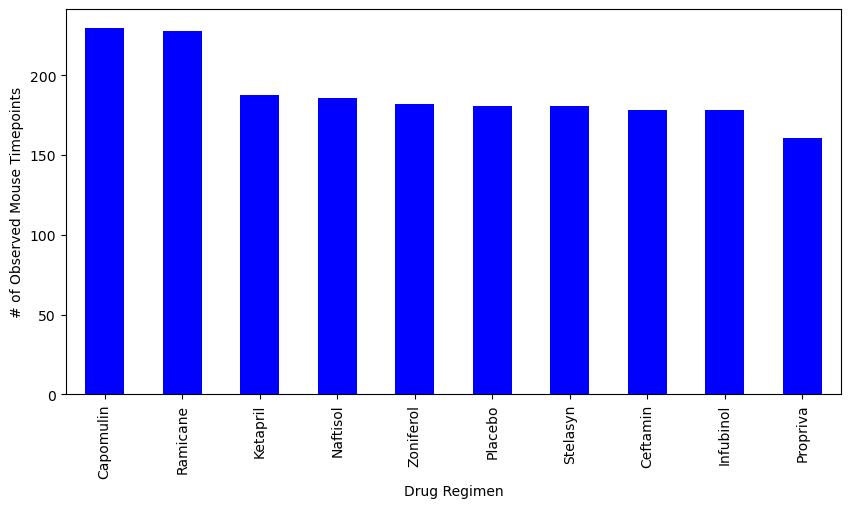

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen = combined_df.groupby('Drug Regimen').size()

drug_regimen_count = drug_regimen.sort_values(ascending=False)
drug_regimen_count.plot(kind='bar', color='blue', figsize = (10,5))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

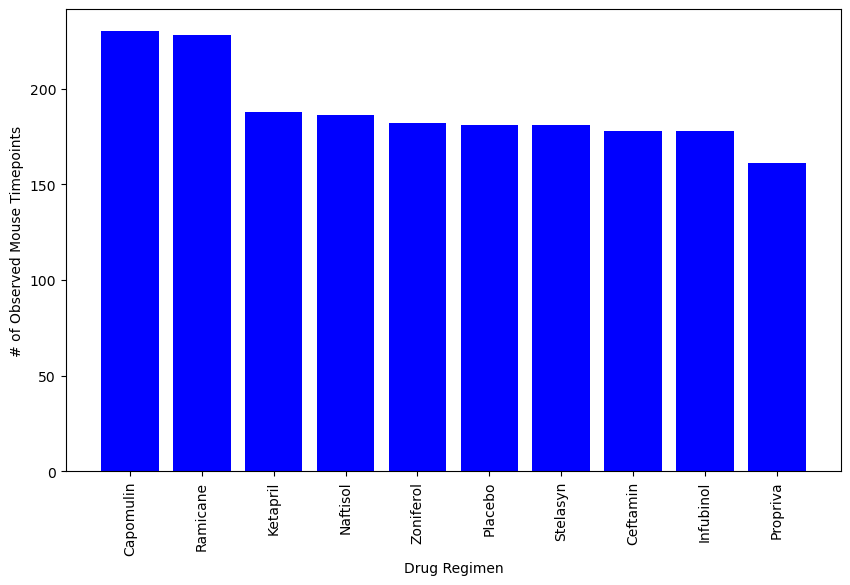

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_count.index, drug_regimen_count.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

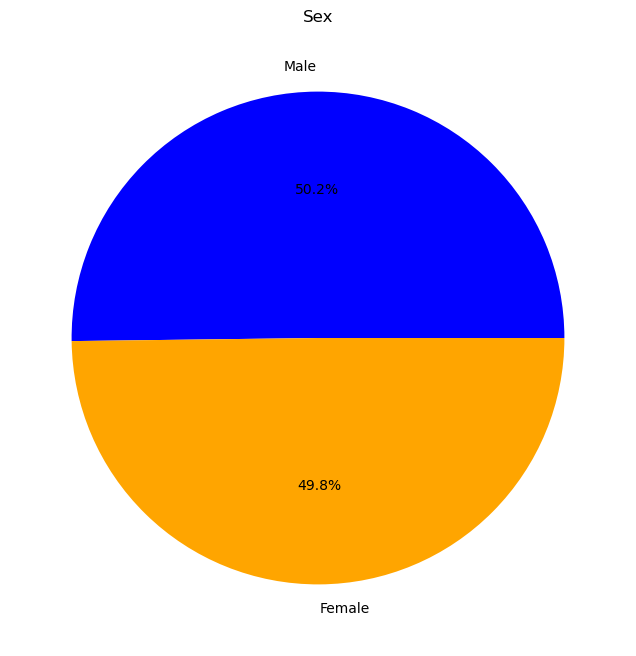

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = mouse_metadata['Sex'].value_counts()

gender_counts.plot(kind='pie', colors=['blue', 'orange'], autopct='%1.1f%%', startangle=0, figsize=(8, 8))
plt.title('Sex')
plt.ylabel('')
plt.show()

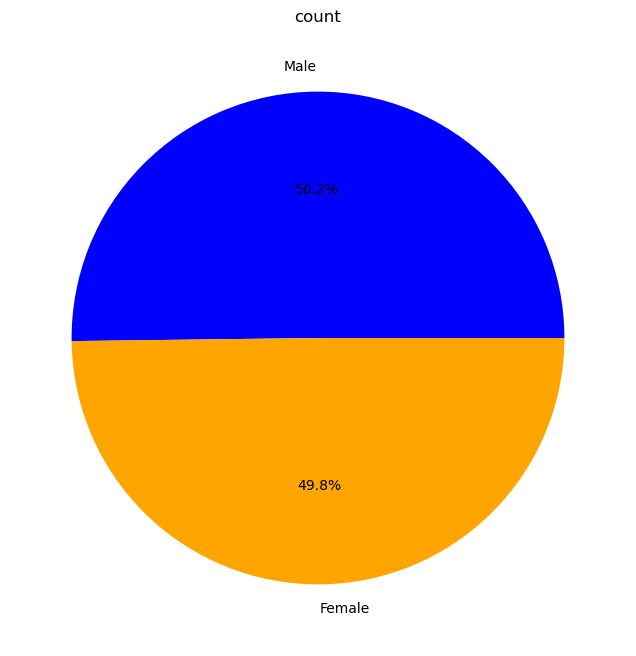

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = mouse_metadata['Sex'].value_counts() 

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, colors=['blue', 'orange'], autopct='%1.1f%%', )
plt.title('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = combined_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepoint,combined_df, on=['Mouse ID', 'Timepoint'], how='inner')

merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,20,23
1,a251,45,65.525743,1,Infubinol,21,25
2,a262,45,70.717621,4,Placebo,17,29
3,a275,45,62.999356,3,Ceftamin,20,28
4,a366,30,63.440686,1,Stelasyn,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatments in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merged_df[merged_df['Drug Regimen'] == treatments]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(subset)

    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    print(f"{treatments}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


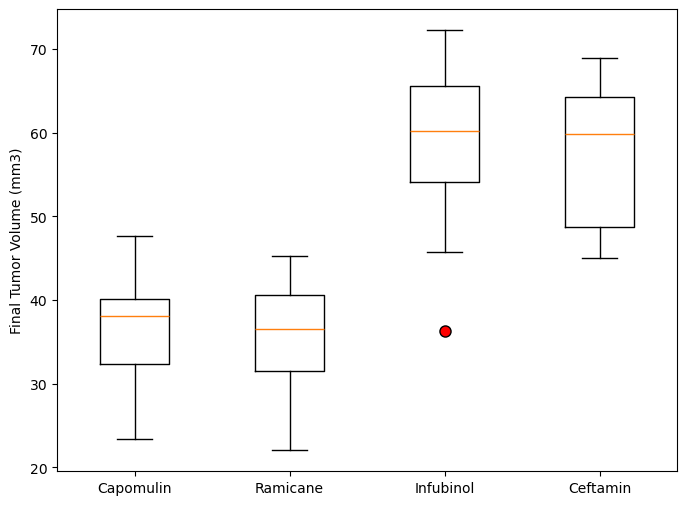

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

plt.figure(figsize=(8, 6))
box = plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(False)

plt.show()

## Line and Scatter Plots

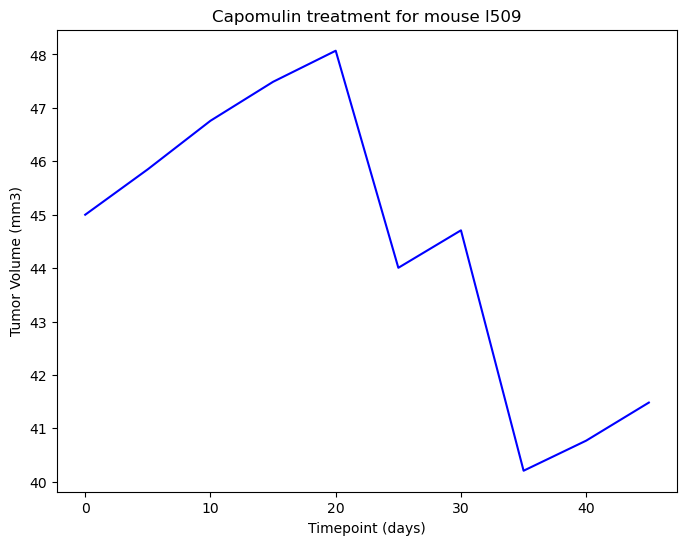

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomuline 
mouse_id = 'l509'
capomulin_data = combined_df[(combined_df['Drug Regimen'] == 'Capomulin') & (combined_df['Mouse ID'] == mouse_id)]

# Sort the data by 'Timepoint' to ensure the line plot connects points in chronological order
capomulin_data = capomulin_data.sort_values('Timepoint')

# Extract time points and tumor volumes
time_points = capomulin_data['Timepoint']
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(time_points, tumor_volumes, color='b', label=f'Mouse ID: {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment for mouse {mouse_id}')

plt.show()


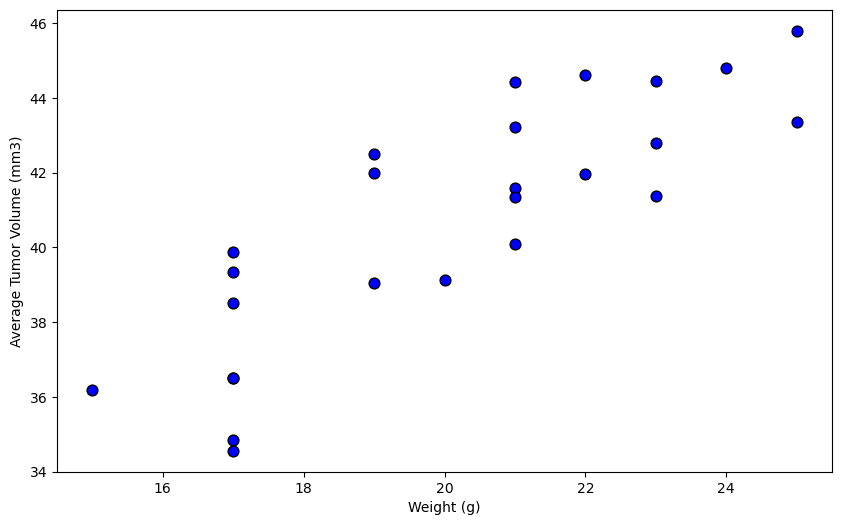

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

#scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(avg_weight, avg_tumor_volume, color='blue', edgecolors='black', s=60)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


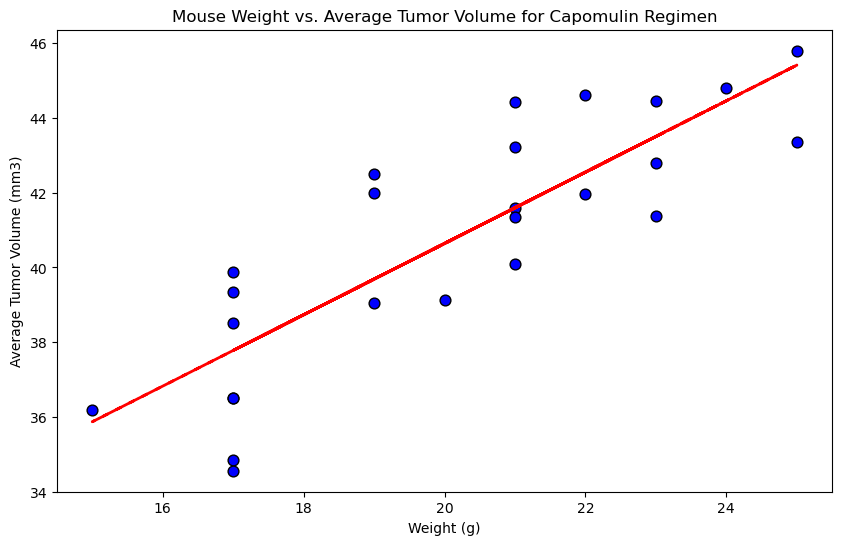

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
from scipy.stats import linregress

correlation = np.corrcoef(avg_weight, avg_tumor_volume)[0, 1]

slope, intercept, r_value, p_value, std_err = linregress(avg_weight, avg_tumor_volume)

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_weight, avg_tumor_volume, color='blue', edgecolors='black', s=60)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(avg_weight, slope * avg_weight + intercept, color='red', linestyle='dashed', linewidth=2)

print(f"The correlation between mouse weight and the average tumor volume is 0.84")
plt.show()